<a href="https://colab.research.google.com/github/hilaaml/IndeksPerpus/blob/master/UAS_BDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : SAHILA AMALIA**

 **NIM : 23.11.5678**

 ---

 **UAS BIG DATA LANJUT 2026**

1. Ambil sebuah studi kasus tertentu dengan dataset primer / sekunder dengan syarat memenuhi minimal 3 dari kategori Big Data 5V, boleh data terstruktur maupun tidak terstruktur. (SCPMK 1534104, SCPMK 1534001)

2. Gunakan file system HDFS (Hadoop file system) maupun file system lain untuk menyimpan dataset yang anda gunakan (SCPMK 1534103)

3. Lakukan pemrosesan data menggunakan PySpark sesuai dengan pipeline bigdata diantaranya :

    a. Gunakan pemrosesan batch dengan menggunakan mapreduce (SCPMK 1532206)

    b. Gunakan EDA (exploratory data analysis) untuk menganalisa data yang anda miliki, visualisasikan data yang anda miliki! (SCPMK 1534103)

    c. Untuk menjamin kualitas data gunakan Preprosesing data: casting tipe, handling missing value, dll. (SCPMK 1534104)

    d. Gunakan manipulasi data seperti query spark (Spark SQL, CTE, sub query, sql hint, dll), agregasi nilai (SCPMK 1534104)
    
    e. Lakukan operasi partisi menggunakan RDD seperti map, flatmap, partitioner, byKey (reducebykey, groupbykey, combinebykey/aggregatebykey) (SCPMK 1532205)

4. Dari data yang telah bersih lakukan permodelan algoritma berbasis ML framework (MLLib) sesuai dengan tugas dataset yang anda miliki (supervised / unsupervised), komparasi minimal 2 algoritma sesuai dengan tugas project anda (SCPMK 1534007, SCPMK 1534008, SCPMK 1534109, SCPMK 1534110)

5. Lakukan hyperparameter tuning terhadap best model dari soal ke 4. Interpretasikan hasil yang ada dengan baik (SCPMK 1534114).

6. Gunakan evaluasi model yang anda telah buat seperti (RMSE, MSE, Akurasi, presisi, recall, F1-Score, AUC, Silhoutte, dsbnya sesuai dengan tujuan project) (SCPMK 1534113)


 ---

**DATASET**

[eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop) berisikan log  aktivitas pengguna (User Behavior) dari toko kosmetik online selama 5 bulan (Oktober 2019 - Februari 2020).

**LAUNCHINPAD**

Tautan : https://launchinpad.amikom.ac.id/project/analisis-perilaku-konsumen-dan-klasifikasi-purchase-interaction-pada-platform-e-commerce-kosmetik-menggunakan-ekosistem-pyspark-e71848f

**(1) STUDI KASUS** (SCPMK 1534104, SCPMK 1534001)

> "Analisis Perilaku Konsumen dan Klasifikasi Purchase Interaction pada Platform E-Commerce Kosmetik"

Tujuan utama dari project ini adalah untuk membangun model klasifikasi yang mampu mengklasifikasikan suatu interaksi user merupakan event pembelian atau bukan.

Permodelan ML yang dilakukan adalah Supervised Learning yaitu Logistic Regression dan Random Forest classifier

# Setup

Environment Setup

In [107]:
import os
import subprocess
import importlib.util

# 1. Cek & Instal Java (openjdk-8-jdk-headless)
if subprocess.run("type java", shell=True, capture_output=True).returncode != 0:
    print("Java tidak ditemukan. Menginstal openjdk-8-jdk-headless...")
    !apt-get install openjdk-8-jdk-headless -qq > /dev/null
else:
    print("Java sudah terinstal.")

# 2. Cek & Instal PySpark
if importlib.util.find_spec("pyspark") is None:
    print("PySpark tidak ditemukan. Menginstal...")
    !pip install -q pyspark
else:
    print("PySpark sudah terinstal.")

# 3. Cek & Instal Kaggle
if importlib.util.find_spec("kaggle") is None:
    print("Kaggle tidak ditemukan. Menginstal...")
    !pip install -q kaggle
else:
    print("Kaggle sudah terinstal.")

Java sudah terinstal.
PySpark sudah terinstal.
Kaggle sudah terinstal.


Setup Dataset

In [108]:
# Konfigurasi Kaggle

import os
from google.colab import userdata

# Mengambil kredensial dari Secrets Google Colab
try:
    kaggle_user = userdata.get('KAGGLE_USERNAME')
    kaggle_key = userdata.get('KAGGLE_KEY')

    # Set sebagai Environment Variable
    os.environ['KAGGLE_USERNAME'] = kaggle_user
    os.environ['KAGGLE_KEY'] = kaggle_key

    print("Berhasil memuat kredensial Kaggle")

except Exception as e:
    print(f"Error: {e}")

Berhasil memuat kredensial Kaggle


In [109]:
import os

zip_file = "ecommerce-events-history-in-cosmetics-shop.zip"
expected_csv = "2019-Oct.csv"

# 1. Cek & Download Dataset
if not os.path.exists(zip_file) and not os.path.exists(expected_csv):
    print("Dataset tidak ditemukan. Mendownload dari Kaggle...")
    !kaggle datasets download -d mkechinov/ecommerce-events-history-in-cosmetics-shop
else:
    print("File dataset sudah ada (Zip atau CSV). Lewati download.")

# 2. Cek & Unzip
if os.path.exists(zip_file):
    if not os.path.exists(expected_csv):
        print("Mengekstrak file...")
        !unzip -o {zip_file}
    else:
        print("File sudah diekstrak sebelumnya.")
else:
    print("Tidak ada file zip untuk diekstrak.")

# 3. Cek File Akhir
print("\nIsi direktori saat ini:")
!ls -lh --group-directories-first

File dataset sudah ada (Zip atau CSV). Lewati download.
File sudah diekstrak sebelumnya.

Isi direktori saat ini:
total 2.7G
drwx------ 6 root root 4.0K Jan 29 14:01 drive
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root 397M Mar 16  2020 2019-Dec.csv
-rw-r--r-- 1 root root 521M Mar 16  2020 2019-Nov.csv
-rw-r--r-- 1 root root 461M Mar 16  2020 2019-Oct.csv
-rw-r--r-- 1 root root 467M Mar 16  2020 2020-Feb.csv
-rw-r--r-- 1 root root 479M Mar 16  2020 2020-Jan.csv
-rw-r--r-- 1 root root 430M Mar 16  2020 ecommerce-events-history-in-cosmetics-shop.zip


**(2) Inisialisasi Spark dan Simulasi HDFS** (SCPMK 1534103)

In [110]:
# Import Library

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, dayofweek, hour, when, count, avg, isnan
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [111]:
# Path Proyek

PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/uas_bdl"
PROCESSED_DATA_PATH = f"{PROJECT_PATH}/processed_data"

# Buat folder proyek jika belum ada
if not os.path.exists(PROJECT_PATH):
    os.makedirs(PROJECT_PATH)
    print(f"Folder {PROJECT_PATH} berhasil dibuat.")

In [112]:
# Inisialisasi Spark Session

spark = SparkSession.builder \
    .appName("CosmeticsPurchasePrediction") \
    .master("local[*]") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

print("Spark Session Created successfully")

Spark Session Created successfully


# Data Understanding

Load Dataset

In [113]:
if os.path.exists(PROCESSED_DATA_PATH):
    print("Memuat data dari cache Parquet...")
    df = spark.read.parquet(PROCESSED_DATA_PATH)
else:
    print("Data olahan tidak ditemukan. Membaca dari CSV mentah...")
    raw_dataset_path = "/content/*.csv"
    df = spark.read.csv(raw_dataset_path, header=True, inferSchema=True)
    print("Menyimpan data ke format Parquet untuk sesi berikutnya...")
    df.write.mode("overwrite").parquet(PROCESSED_DATA_PATH)

print(f"Total Rows: {df.count()}")
df.printSchema()

Data olahan tidak ditemukan. Membaca dari CSV mentah...
Menyimpan data ke format Parquet untuk sesi berikutnya...
Total Rows: 20692840
root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



**(1) Analisis Dataset** :


1. Volume : 20.692.840 baris
2. Velocity : berupa log activity (event stream)
3. Variety : berupa campuran kolom kategorikal (brand, category_code), numerik (price, product_id), dan waktu (event_time).



**(3a) Pemrosesan Batch Dengan MapReduce (RDD)** (SCPMK 1532206)

In [114]:
# Mengonversi DataFrame ke RDD
rdd = df.select("event_type").rdd

# Map: Mengubah setiap baris menjadi pasangan (key, value) -> (event_type, 1)
mapped_rdd = rdd.map(lambda row: (row.event_type, 1))

# Reduce: Menjumlahkan value berdasarkan key
reduced_rdd = mapped_rdd.reduceByKey(lambda a, b: a + b)

# Mengambil hasil
event_counts_rdd = reduced_rdd.collect()

print("--- Hasil MapReduce (Event Counts) ---")
for event, count_val in event_counts_rdd:
    print(f"{event}: {count_val}")

--- Hasil MapReduce (Event Counts) ---
purchase: 1287007
remove_from_cart: 3979679
view: 9657821
cart: 5768333


## **(3b) Exploratory Data Analysis (EDA) & Visualisasi** (SCPMK 1534103)

/tmp/ipython-input-64237973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_type', y='count', data=event_stats, palette='viridis')


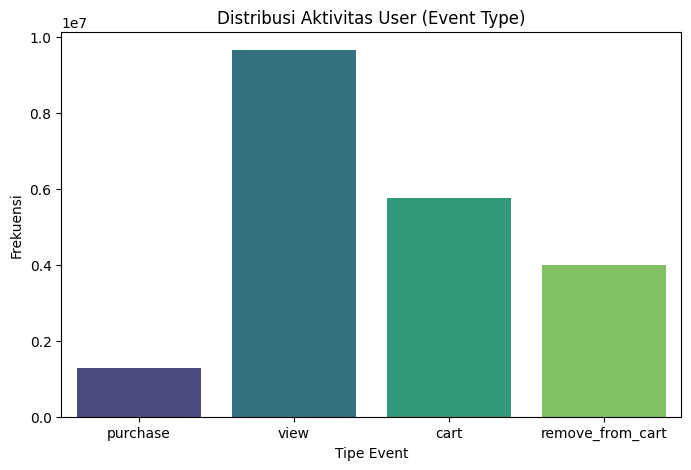

+-------+-----------------+
|summary|            price|
+-------+-----------------+
|  count|         20692840|
|   mean| 8.53473548048573|
| stddev|19.38142460687464|
|    min|           -79.37|
|    max|           327.78|
+-------+-----------------+



In [115]:
# Agregasi data menggunakan Spark sebelum visualisasi
event_stats = df.groupBy("event_type").count().toPandas()

# Visualisasi Distribusi Event
plt.figure(figsize=(8, 5))
sns.barplot(x='event_type', y='count', data=event_stats, palette='viridis')
plt.title('Distribusi Aktivitas User (Event Type)')
plt.xlabel('Tipe Event')
plt.ylabel('Frekuensi')
plt.show()

# Cek Statistik Harga (Price)
df.describe(['price']).show()

# Preprocessing Data

**(3c) Data Cleaning, Casting dan Feature Engineering** (SCPMK 1534104)

In [125]:
# Handling Missing Values

# Hapus baris jika user_session atau event_type null (karena kritikal)
df_clean = df.dropna(subset=['user_session', 'event_type'])

# Isi missing value pada category_code dan brand dengan 'unknown'
df_clean = df_clean.fillna({'category_code': 'unknown', 'brand': 'unknown'})

In [126]:
# Casting & Feature Engineering

# Ubah event_time dari string ke timestamp
df_clean = df_clean.withColumn("event_time", to_timestamp(col("event_time")))

# Ekstrak fitur waktu
df_processed = df_clean.withColumn("hour", hour(col("event_time"))) \
                       .withColumn("day_of_week", dayofweek(col("event_time")))

print("Data setelah preprocessing:")
df_processed.show(5)

Data setelah preprocessing:
+-------------------+----------------+----------+-------------------+-------------+---------+-----+---------+--------------------+----+-----------+
|         event_time|      event_type|product_id|        category_id|category_code|    brand|price|  user_id|        user_session|hour|day_of_week|
+-------------------+----------------+----------+-------------------+-------------+---------+-----+---------+--------------------+----+-----------+
|2019-12-01 00:00:00|remove_from_cart|   5712790|1487580005268456287|      unknown|    f.o.x| 6.27|576802932|51d85cb0-897f-48d...|   0|          1|
|2019-12-01 00:00:00|            view|   5764655|1487580005411062629|      unknown|      cnd|29.05|412120092|8adff31e-2051-489...|   0|          1|
|2019-12-01 00:00:02|            cart|      4958|1487580009471148064|      unknown|   runail| 1.19|494077766|c99a50e8-2fac-4c4...|   0|          1|
|2019-12-01 00:00:05|            view|   5848413|1487580007675986893|      unknown|f

**(3d) Manipulasi Data (Spark SQL & Agregasi)** (SCPMK 1534104)

In [118]:
# Register Temporary View agar bisa di-query dengan SQL
df_processed.createOrReplaceTempView("events")

# Hitung Conversion Rate per Brand
# (Jumlah Purchase / Jumlah View) * 100 untuk brand yang dilihat > 1000 kali

query = """
WITH BrandStats AS (
    SELECT
        brand,
        SUM(CASE WHEN event_type = 'view' THEN 1 ELSE 0 END) as views,
        SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END) as purchases
    FROM events
    WHERE brand != 'unknown'
    GROUP BY brand
)
SELECT
    brand,
    views,
    purchases,
    ROUND((purchases / views) * 100, 2) as conversion_rate_percent
FROM BrandStats
WHERE views > 1000
ORDER BY conversion_rate_percent DESC
LIMIT 10
"""

top_brands = spark.sql(query)
print("--- Top 10 Brands by Conversion Rate (Spark SQL)---")
top_brands.show()

--- Top 10 Brands by Conversion Rate (Spark SQL)---
+---------+-----+---------+-----------------------+
|    brand|views|purchases|conversion_rate_percent|
+---------+-----+---------+-----------------------+
|   eunyul| 1823|     1141|                  62.59|
|   dermal| 1954|     1072|                  54.86|
|   elskin| 1798|      759|                  42.21|
|    soleo| 3320|     1235|                   37.2|
| severina|26333|     9173|                  34.83|
|swarovski|12909|     4031|                  31.23|
|   benovy| 7873|     2180|                  27.69|
|  nitrile| 1691|      468|                  27.68|
| airnails|27354|     7504|                  27.43|
| farmstay|12302|     3356|                  27.28|
+---------+-----+---------+-----------------------+



**(3e) Operasi Partisi RDD Lanjut** (SCPMK 1532205)

In [119]:
# Pilih brand, dan price
rdd_subset = df_processed.select("brand", "price").rdd.filter(lambda x: x.brand != 'unknown')

# Repartition: Mengubah jumlah partisi menjadi 4
rdd_partitioned = rdd_subset.repartition(4)
print(f"Jumlah partisi RDD: {rdd_partitioned.getNumPartitions()}")

# AggregateByKey: Menghitung (Total Harga, Jumlah Item) per Brand
# Initial value: (0.0, 0) -> (sum_price, count)
# SeqOp: Menambahkan harga item ke akumulator partisi
# CombOp: Menggabungkan hasil dari partisi berbeda
agg_rdd = rdd_partitioned.aggregateByKey(
    (0.0, 0),
    lambda acc, value: (acc[0] + value, acc[1] + 1),
    lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])
)

# Hitung Rata-rata harga per brand dari hasil agregasi
avg_price_rdd = agg_rdd.mapValues(lambda x: x[0] / x[1])

print("\n--- Rata-rata Harga per Brand (RDD AggregateByKey) ---")
for brand, avg_price in avg_price_rdd.take(5):
    print(f"Brand: {brand}, Avg Price: {avg_price:.2f}")

Jumlah partisi RDD: 4

--- Rata-rata Harga per Brand (RDD AggregateByKey) ---
Brand: grattol, Avg Price: 5.47
Brand: skinlite, Avg Price: 2.62
Brand: masura, Avg Price: 3.39
Brand: severina, Avg Price: 2.79
Brand: kapous, Avg Price: 3.89


# Penyimpanan Data Bersih

In [128]:
# RAM
df_processed.cache()
print(f"Data hasil preprocessing di-cache. (Jumlah: {df_processed.count()})")

# Write Parquet
print("Menyimpan data hasil preprocessing...")
df_processed.write.mode("overwrite").parquet(PROCESSED_DATA_PATH)

Data hasil preprocessing di-cache. (Jumlah: 20688242)
Menyimpan data hasil preprocessing...


In [129]:
df_processed.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = false)
 |-- brand: string (nullable = false)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)



# **(4) Permodelan Machine Learning (MLLib)** (SCPMK 1534007, 1534008, 1534109, 1534110)


In [130]:
# 1. Labeling: 1 jika purchase, 0 jika lainnya

df_ml = df_processed.withColumn("label", when(col("event_type") == "purchase", 1.0).otherwise(0.0))

In [131]:
# 2. Downsampling (Karena data view sangat banyak dibanding purchase)

# Ambil semua purchase dan sampel view dengan rasio tertentu
fraction = df_ml.filter(col("label") == 1).count() / df_ml.filter(col("label") == 0).count()
df_ml_balanced = df_ml.sampleBy("label", fractions={0: fraction * 2, 1: 1.0}, seed=42)

In [132]:
# 3. Feature Preparation

# Mengubah kolom kategori menjadi indeks numerik
cat_indexer = StringIndexer(inputCol="category_code", outputCol="cat_idx", handleInvalid="keep")
brand_indexer = StringIndexer(inputCol="brand", outputCol="brand_idx", handleInvalid="keep")

# One Hot Encoding (agar model tidak menganggap urutan angka sebagai ranking)
encoder = OneHotEncoder(inputCols=["cat_idx", "brand_idx"], outputCols=["cat_vec", "brand_vec"])

# Menyatukan semua fitur menjadi satu kolom vektor
assembler = VectorAssembler(
    inputCols=["cat_vec", "brand_vec", "price", "hour", "day_of_week"],
    outputCol="features"
)

# Standard Scaler (Penting untuk Logistic Regression)
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

In [133]:
# 4. Split Data

sessions = df_ml_balanced.select("user_session").distinct()
train_sessions, test_sessions = sessions.randomSplit([0.8, 0.2], seed=42)

train_data = df_ml_balanced.join(train_sessions, on="user_session")
test_data  = df_ml_balanced.join(test_sessions, on="user_session")

print(f"Training Count: {train_data.count()}")
print(f"Testing Count: {test_data.count()}")

Training Count: 3088730
Testing Count: 776072


Model : Logistic Regression dan Random Forest

In [134]:
# Model 1: Logistic Regression
lr = LogisticRegression(featuresCol="scaled_features", labelCol="label", maxIter=10)

In [135]:
# Model 2: Random Forest
rf = RandomForestClassifier(featuresCol="scaled_features", labelCol="label", numTrees=20, maxDepth=5)

In [136]:
# Pipeline Konstruksi (Preprocessing + Model)
pipeline_lr = Pipeline(stages=[cat_indexer, brand_indexer, encoder, assembler, scaler, lr])
pipeline_rf = Pipeline(stages=[cat_indexer, brand_indexer, encoder, assembler, scaler, rf])

In [137]:
# Training Model Dasar
print("Training Logistic Regression...")
model_lr = pipeline_lr.fit(train_data)

print("Training Random Forest...")
model_rf = pipeline_rf.fit(train_data)

Training Logistic Regression...
Training Random Forest...


**(5) Hyperparameter Tuning** (SCPMK 1534114)

In [139]:
# Gunakan Random Forest untuk dituning
rf_tune = RandomForestClassifier(featuresCol="scaled_features", labelCol="label")

# Pipeline khusus tuning (tanpa model yang sudah fit)
pipeline_tune = Pipeline(stages=[cat_indexer, brand_indexer, encoder, assembler, scaler, rf_tune])

# Grid Parameter
paramGrid = ParamGridBuilder() \
    .addGrid(rf_tune.numTrees, [20, 50]) \
    .addGrid(rf_tune.maxDepth, [5, 10]) \
    .build()

# Evaluator untuk tuning
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Cross Validator (3-fold)
cv = CrossValidator(estimator=pipeline_tune,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator_auc,
                    numFolds=3)

print("Memulai Hyperparameter Tuning...")
cvModel = cv.fit(train_data)

# Ambil model terbaik
best_model = cvModel.bestModel
print(f"Best Model Hyperparams - Trees: {best_model.stages[-1].getNumTrees}, Depth: {best_model.stages[-1].getMaxDepth}")

Memulai Hyperparameter Tuning...
Best Model Hyperparams - Trees: 50, Depth: <bound method _DecisionTreeParams.getMaxDepth of RandomForestClassificationModel: uid=RandomForestClassifier_9d60ed5c14d1, numTrees=50, numClasses=2, numFeatures=286>


# **(6) Evaluasi Model** (SCPMK 1534113)

In [140]:
# Prediksi pada Data Test
pred_lr = model_lr.transform(test_data)
pred_rf = model_rf.transform(test_data)
pred_best = best_model.transform(test_data)

# Evaluators
eval_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
eval_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
eval_auc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

def print_metrics(name, predictions):
    acc = eval_acc.evaluate(predictions)
    f1 = eval_f1.evaluate(predictions)
    auc = eval_auc.evaluate(predictions)
    print(f"--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"AUC      : {auc:.4f}\n")

print("\nHasil Evaluasi\n\n")
print_metrics("Logistic Regression", pred_lr)
print_metrics("Random Forest (Basic)", pred_rf)
print_metrics("Random Forest (Tuned)", pred_best)


Hasil Evaluasi


--- Logistic Regression ---
Accuracy : 0.6679
F1 Score : 0.5387
AUC      : 0.5910

--- Random Forest (Basic) ---
Accuracy : 0.6680
F1 Score : 0.5351
AUC      : 0.5065

--- Random Forest (Tuned) ---
Accuracy : 0.6680
F1 Score : 0.5351
AUC      : 0.5891




Jika AUC Random Forest lebih tinggi, artinya model ini lebih baik dalam membedakan kelas positif (purchase) dan negatif.Feature Importance pada Random Forest bisa menunjukkan faktor apa (misal: harga atau brand) yang paling memengaruhi pembelian.